# 1. FastQC

Установка

In [ ]:
!wget https://www.bioinformatics.babraham.ac.uk/projects/fastqc/fastqc_v0.11.9.zip
!unzip fastqc_v0.11.9.zip
!chmod a+x FastQC/fastqc

Загружаем один из файлов (8 Cell) 

In [6]:
! wget ftp://ftp.sra.ebi.ac.uk/vol1/fastq/SRR583/003/SRR5836473/SRR5836473_1.fastq.gz

--2022-02-17 19:36:47--  ftp://ftp.sra.ebi.ac.uk/vol1/fastq/SRR583/003/SRR5836473/SRR5836473_1.fastq.gz
           => ‘SRR5836473_1.fastq.gz’
Resolving ftp.sra.ebi.ac.uk (ftp.sra.ebi.ac.uk)... 193.62.197.74
Connecting to ftp.sra.ebi.ac.uk (ftp.sra.ebi.ac.uk)|193.62.197.74|:21... connected.
Logging in as anonymous ... Logged in!
==> SYST ... done.    ==> PWD ... done.
==> TYPE I ... done.  ==> CWD (1) /vol1/fastq/SRR583/003/SRR5836473 ... done.
==> SIZE SRR5836473_1.fastq.gz ... 6856386252
==> PASV ... done.    ==> RETR SRR5836473_1.fastq.gz ... done.
Length: 6856386252 (6.4G) (unauthoritative)

SRR5836473_1.fastq. 100%[===================>]   6.38G  18.2MB/s    in 9m 18s  

2022-02-17 19:46:06 (11.7 MB/s) - ‘SRR5836473_1.fastq.gz’ saved [6856386252]



In [7]:
! gunzip SRR5836473_1.fastq.gz

fastqc

In [10]:
! ./FastQC/fastqc  /content/drive/MyDrive/SRR5836473_1.fastq

Started analysis of SRR5836473_1.fastq
Approx 5% complete for SRR5836473_1.fastq
Approx 10% complete for SRR5836473_1.fastq
Approx 15% complete for SRR5836473_1.fastq
Approx 20% complete for SRR5836473_1.fastq
Approx 25% complete for SRR5836473_1.fastq
Approx 30% complete for SRR5836473_1.fastq
Approx 35% complete for SRR5836473_1.fastq
Approx 40% complete for SRR5836473_1.fastq
Approx 45% complete for SRR5836473_1.fastq
Approx 50% complete for SRR5836473_1.fastq
Approx 55% complete for SRR5836473_1.fastq
Approx 60% complete for SRR5836473_1.fastq
Approx 65% complete for SRR5836473_1.fastq
Approx 70% complete for SRR5836473_1.fastq
Approx 75% complete for SRR5836473_1.fastq
Approx 80% complete for SRR5836473_1.fastq
Approx 85% complete for SRR5836473_1.fastq
Approx 90% complete for SRR5836473_1.fastq
Approx 95% complete for SRR5836473_1.fastq
Analysis complete for SRR5836473_1.fastq


# 2 

### Установка Bismark с зависимостями (+bowtie2, samtools)

In [17]:
! pip install -q condacolab
import condacolab
condacolab.install()

⏬ Downloading https://github.com/jaimergp/miniforge/releases/latest/download/Mambaforge-colab-Linux-x86_64.sh...
📦 Installing...
📌 Adjusting configuration...
🩹 Patching environment...
⏲ Done in 0:00:34
🔁 Restarting kernel...


In [18]:
import condacolab
condacolab.check()

AssertionError: ignored

In [1]:
! conda install -c bioconda bismark

Solving environment: | / - \ | / - \ | / done

## Package Plan ##

  environment location: /usr/local

  added / updated specs:
    - bismark


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    bismark-0.23.1             |       hdfd78af_0         6.6 MB  bioconda
    bowtie2-2.2.5              |   py37h22450f8_8        14.9 MB  bioconda
    ca-certificates-2021.10.8  |       ha878542_0         139 KB  conda-forge
    certifi-2021.10.8          |   py37h89c1867_1         145 KB  conda-forge
    conda-4.11.0               |   py37h89c1867_0        16.9 MB  conda-forge
    hisat2-2.2.1               |       h1b792b2_3        16.5 MB  bioconda
    perl-5.32.1                | 0_h7f98852_perl5        14.5 MB  conda-forge
    python_abi-3.7             |          2_cp37m           4 KB  conda-forge
    samtools-1.3.1             |                0         1.5 MB  bioconda
  

Проверка работы

In [4]:
! samtools view


Usage: samtools view [options] <in.bam>|<in.sam>|<in.cram> [region ...]

Options:
  -b       output BAM
  -C       output CRAM (requires -T)
  -1       use fast BAM compression (implies -b)
  -u       uncompressed BAM output (implies -b)
  -h       include header in SAM output
  -H       print SAM header only (no alignments)
  -c       print only the count of matching records
  -o FILE  output file name [stdout]
  -U FILE  output reads not selected by filters to FILE [null]
  -t FILE  FILE listing reference names and lengths (see long help) [null]
  -L FILE  only include reads overlapping this BED FILE [null]
  -r STR   only include reads in read group STR [null]
  -R FILE  only include reads with read group listed in FILE [null]
  -q INT   only include reads with mapping quality >= INT [0]
  -l STR   only include reads in library STR [null]
  -m INT   only include reads with number of CIGAR operations consuming
           query sequence >= INT [0]
  -f INT   only include reads with a

Загружаем файлы .bam с google drive (скачала к себе и загрузила локально, поэтому без !gdown --id)

In [8]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
# bam файлы
# /content/drive/MyDrive/bioinfHW1/cell8/SRR5836473_1_bismark_bt2_pe.bam
# /content/drive/MyDrive/bioinfHW1/epiblast/SRR3824222_1_bismark_bt2_pe.bam
# /content/drive/MyDrive/bioinfHW1/ICM/SRR5836475_1_bismark_bt2_pe.bam


In [7]:
# отчет о выравнивании
# /content/drive/MyDrive/bioinfHW1/cell8/SRR5836473_1_bismark_bt2_PE_report.txt
# /content/drive/MyDrive/bioinfHW1/epiblast/SRR3824222_1_bismark_bt2_PE_report.txt
# /content/drive/MyDrive/bioinfHW1/ICM/SRR5836475_1_bismark_bt2_PE_report.txt


### Число ридов, закартированных на участки 11347700-11367700; 40185800-40195800

In [9]:
! samtools view /content/drive/MyDrive/bioinfHW1/cell8/SRR5836473_1_bismark_bt2_pe.bam | head

SRR5836473.18_18/1	99	chr11	116830009	0	139M	=	116830059	190	TTTATTTTGTTATTGGATTTAGAGATTATTTGGCGGGAATCGGGTTTTTTTTTTTTTTTTTTATAATAGAGTGTCGTAATAGTAAAATTGAGTTTTGATTAGAGTGATTTTGATTTGGTTTCGTTTTTTTTTTCGTTCG	FKKKKKKKKKKKKKKKK<FKKKKFKKKKKKKKKKKKKFKKKKKKFAFKKKKKKKKKKKKKKKAKFFFFKFF7FFFKFKK7AKKKKKKKKAFKKKKAFKKAFKFK,F<FAKKKAFAFFF,FKKKKKKKKKKKKFF<A77F	NM:i:37	MD:Z:0C1C2C0C2C2C6C0C23C0C0C0C0C1C0C0C0C0C2C0C2C4C0T8G2C12C4T1C7C0C4C4C1C4C3C2C3C2	XM:Z:h.h..hx..h..x......x.............Z......Z...hhhhh.hhhhh..hh..h....x.......Z....x............h......x.......hh....h....h.xZ...h...h..xZ..xZ.	XR:Z:CT	XG:Z:CT
SRR5836473.18_18/1	147	chr11	116830059	0	140M	=	116830009	-190	TTTTTTTTTTTTATAATAGAGTGTCGTAATAGTAAAATTGAGTTTTGATTAGAGTGATTTTGATTTGGTTTCGTTTTTTTTTTCGTTCGTTTAGTTTTTTTTTTGTAGTTCGAGTTGTTATTTTAGTTGAATTGTTTATT	KKF<A,KAFA7A7,K77KF<F<A<F<7,,7,7A7,,7AFFFA<,KKKAA<<,7KAF7KKFAA<AKFKKF7<KKKKFKKKKKFFKKFFFKKKKKKKKKFKKKKKKKKFKKFKKKKKKKKKKKKKKKKKKKKKKKKKKKKKF	NM:i:39	MD:Z:0C0C0C0C0C2C0C2C4C0T8G2C12C4T1C7C0C4C4C1C4C3C2C3C

In [10]:
! samtools view /content/drive/MyDrive/bioinfHW1/epiblast/SRR3824222_1_bismark_bt2_pe.bam | head

SRR3824222.40_40/1	99	chr11	8735553	16	140M	=	8735587	174	TTAAAGGAGAATTGTTAATTTTAGATTTAGTAAGGTTTAGGTAAGAATTATGTTATTAGTAATATTACGATTTGTGGTTAAAATAGGAGTTGGAAGTTGTTTTTTTTTATTTTTGTTATTTTTATAGTTTGAGGAATTAA	KKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKK7FKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKK	NM:i:29	MD:Z:0C6T5A1C2C0C1C13C0C4C11C8C2C11C11C7C3C0C1C2C2C0C0C8C0C1C2C0C7C3	XM:Z:h..............h..hh.x.............hh....h...........h........h..h.Z.........h...........x.......z...hh.h..h..hhx........hh.x..hx.......h...	XR:Z:CT	XG:Z:CT
SRR3824222.40_40/1	147	chr11	8735587	16	140M	=	8735553	-174	GTTTAGGTAAGAATTATGTTATTAGTAATATTACGATTTGTGGTTAAAATAGGAGTTGGAAGTTGTTTTTTTTTATTTTTGTTATTTTTATAGTTTGAGGAATTAAGGATATTTTGTAGTAATAGTAAGGGTGAAAAGTT	KF<KKKKKKKKKKKKKKKFKKKKKKKKKFFAKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKK	NM:i:30	MD:Z:1C0C4C11C8C2C11C11C7C3C0C1C2C2C0C0C8C0C1C2C0C7C6C1C0C3C5C2C12C0C0	

In [11]:
! samtools view /content/drive/MyDrive/bioinfHW1/ICM/SRR5836475_1_bismark_bt2_pe.bam | head

SRR5836475.1_1/1	83	chr11	27610910	0	140M	=	27610897	-153	TTTACAAAAAATTTAAAACAAATAAAATAAAAACAAAATAAACCTTTAATAACCTTAAAAAAAATAACTACCCCTCTTTTATTTTAAAAAACCAATTCTTTAAAATACAATAAACACATTCAACTATTCCTTATCCCATA	FFKKAKAKKKKKKKKKKKKKKKKKKFKKKKKKKKKFAKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKK	NM:i:39	MD:Z:1G1G3G7G0G8G0G1G2G0G3G0G1G0G0G5G0G1G5G0G0G0G0G1T3G2G10G1C5G1G12G0G1G1G2G1G3G14G6G0	XM:Z:...h...h.......hh........hh.h..hh...hh.hhh.....hh.h.....hhhhh.....h..x..........h.......h.h............hh.h.z..h.h...z..............h......h	XR:Z:CT	XG:Z:GA
SRR5836475.1_1/1	163	chr11	27610897	0	140M	=	27610910	153	CCTTTAATATCAATTTACAAAAAATTTAAAACAAATAAAATAAAAACAAAATAAACCTTTAATAACCTTAAAAAAAATAACTACCCCTCTTTTATTTTAAAAAACCAATTCTTTAAAATACAATAAACACATTCAACTAT	FFKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKFKKKKKKKKKKKFKKKKKKKKKKKKAKKKKFKKKFFKKKKKFKKAAKKKAFAAFKKKF<AKKK	NM:i:41	MD:Z:2C2G5G0G1G1G3G7G0G8G0G1G2G0G3G0G1G0G0G5G0G1G5G0G0

In [12]:
! samtools sort /content/drive/MyDrive/bioinfHW1/cell8/SRR5836473_1_bismark_bt2_pe.bam -o /content/sorted_8cell.bam
! samtools sort /content/drive/MyDrive/bioinfHW1/epiblast/SRR3824222_1_bismark_bt2_pe.bam -o /content/sorted_epiblast.bam
! samtools sort /content/drive/MyDrive/bioinfHW1/ICM/SRR5836475_1_bismark_bt2_pe.bam -o /content/sorted_icm.bam

[bam_sort_core] merging from 5 files...
[bam_sort_core] merging from 11 files...
[bam_sort_core] merging from 7 files...


In [13]:
! samtools index  /content/sorted_8cell.bam
! samtools index  /content/sorted_epiblast.bam
! samtools index  /content/sorted_icm.bam

Сколько ридов закартировалось на участки 11347700-11367700; 40185800-40195800?

In [16]:
! samtools view /content/sorted_8cell.bam chr11:11347700-11367700 | cut -f1 | sort -u | wc -l
! samtools view /content/sorted_epiblast.bam chr11:11347700-11367700 | cut -f1 | sort -u | wc -l
! samtools view /content/sorted_icm.bam chr11:11347700-11367700 | cut -f1 | sort -u | wc -l

1090
2328
1456


In [17]:
! samtools view /content/sorted_8cell.bam chr11:40185800-40195800 | cut -f1 | sort -u | wc -l
! samtools view /content/sorted_epiblast.bam chr11:40185800-40195800 | cut -f1 | sort -u | wc -l
! samtools view /content/sorted_icm.bam chr11:40185800-40195800 | cut -f1 | sort -u | wc -l

464
1062
630


### Дедупликация для всех образцов одновременно (Бонус 1)

In [7]:
# Для одновременной дедупликации (обрабатываются файлы с названиями *_pe.bam)
! ls /content/drive/MyDrive/bioinfHW1/cell8/SRR5836473_1_bismark_bt2_pe.bam /content/drive/MyDrive/bioinfHW1/epiblast/SRR3824222_1_bismark_bt2_pe.bam /content/drive/MyDrive/bioinfHW1/ICM/SRR5836475_1_bismark_bt2_pe.bam  | xargs -P 3 -tI{} deduplicate_bismark  --bam  --paired  -o {}.deduplicated {}

deduplicate_bismark --bam --paired -o /content/drive/MyDrive/bioinfHW1/cell8/SRR5836473_1_bismark_bt2_pe.bam.deduplicated /content/drive/MyDrive/bioinfHW1/cell8/SRR5836473_1_bismark_bt2_pe.bam 
deduplicate_bismark --bam --paired -o /content/drive/MyDrive/bioinfHW1/epiblast/SRR3824222_1_bismark_bt2_pe.bam.deduplicated /content/drive/MyDrive/bioinfHW1/epiblast/SRR3824222_1_bismark_bt2_pe.bam 
deduplicate_bismark --bam --paired -o /content/drive/MyDrive/bioinfHW1/ICM/SRR5836475_1_bismark_bt2_pe.bam.deduplicated /content/drive/MyDrive/bioinfHW1/ICM/SRR5836475_1_bismark_bt2_pe.bam 
Output filename was given as: /content/drive/MyDrive/bioinfHW1/epiblast/SRR3824222_1_bismark_bt2_pe.bam.deduplicated
Processing paired-end Bismark output file(s) (SAM format):
/content/drive/MyDrive/bioinfHW1/epiblast/SRR3824222_1_bismark_bt2_pe.bam


If there are several alignments to a single position in the genome the first alignment will be chosen. Since the input files are not in any way sorted this is a nea

In [8]:
! ls

condacolab_install.log
drive
sample_data
SRR3824222_1_bismark_bt2_pe.bam.deduplicated.deduplicated.bam
SRR3824222_1_bismark_bt2_pe.deduplication_report.txt
SRR5836473_1_bismark_bt2_pe.bam.deduplicated.deduplicated.bam
SRR5836473_1_bismark_bt2_pe.deduplication_report.txt
SRR5836475_1_bismark_bt2_pe.bam.deduplicated.deduplicated.bam
SRR5836475_1_bismark_bt2_pe.deduplication_report.txt


In [9]:
! unzip /content/drive/MyDrive/bioinfHW1/mouse_chr.zip

Archive:  /content/drive/MyDrive/bioinfHW1/mouse_chr.zip
   creating: mouse_chr/
   creating: mouse_chr/Bisulfite_Genome/
   creating: mouse_chr/Bisulfite_Genome/CT_conversion/
  inflating: mouse_chr/Bisulfite_Genome/CT_conversion/genome_mfa.CT_conversion.fa  
  inflating: mouse_chr/Bisulfite_Genome/CT_conversion/BS_CT.4.bt2  
  inflating: mouse_chr/Bisulfite_Genome/CT_conversion/BS_CT.1.bt2  
  inflating: mouse_chr/Bisulfite_Genome/CT_conversion/BS_CT.3.bt2  
  inflating: mouse_chr/Bisulfite_Genome/CT_conversion/BS_CT.2.bt2  
  inflating: mouse_chr/Bisulfite_Genome/CT_conversion/BS_CT.rev.2.bt2  
  inflating: mouse_chr/Bisulfite_Genome/CT_conversion/BS_CT.rev.1.bt2  
   creating: mouse_chr/Bisulfite_Genome/GA_conversion/
  inflating: mouse_chr/Bisulfite_Genome/GA_conversion/BS_GA.rev.1.bt2  
  inflating: mouse_chr/Bisulfite_Genome/GA_conversion/BS_GA.rev.2.bt2  
  inflating: mouse_chr/Bisulfite_Genome/GA_conversion/genome_mfa.GA_conversion.fa  
  inflating: mouse_chr/Bisulfite_Genome/

Время работы: ±30 мин

### Коллинг метилирования цитозинов

In [11]:
! bismark_methylation_extractor --gzip --bedGraph --cytosine_report --genome_folder ./mouse_chr /content/drive/MyDrive/SRR5836473_1_bismark_bt2_pe.bam.deduplicated.deduplicated.bam


 *** Bismark methylation extractor version v0.23.1 ***

Trying to determine the type of mapping from the SAM header line of file /content/drive/MyDrive/SRR5836473_1_bismark_bt2_pe.bam.deduplicated.deduplicated.bam
Treating file(s) as paired-end data (as extracted from @PG line)

Setting option '--no_overlap' since this is (normally) the right thing to do for paired-end data


Setting core usage to single-threaded (default). Consider using --multicore <int> to speed up the extraction process.

Summarising Bismark methylation extractor parameters:
Bismark paired-end SAM format specified (default)
Number of cores to be used: 1
Output will be written to the current directory ('/content')


Summarising bedGraph parameters:
Generating additional output in bedGraph and coverage format
bedGraph format:	<Chromosome> <Start Position> <End Position> <Methylation Percentage>
coverage format:	<Chromosome> <Start Position> <End Position> <Methylation Percentage> <count methylated> <count non-methyl

In [ ]:
! mv *.gz /content/drive/MyDrive/bioinfHW1/bismark_methylation_extractor_SRR5836473
! mv *.txt /content/drive/MyDrive/bioinfHW1/bismark_methylation_extractor_SRR5836473

In [16]:
! bismark_methylation_extractor --gzip --bedGraph --cytosine_report --genome_folder ./mouse_chr /content/drive/MyDrive/bioinfHW1/SRR3824222_1_bismark_bt2_pe.bam.deduplicated.deduplicated.bam


 *** Bismark methylation extractor version v0.23.1 ***

Trying to determine the type of mapping from the SAM header line of file /content/drive/MyDrive/bioinfHW1/SRR3824222_1_bismark_bt2_pe.bam.deduplicated.deduplicated.bam
Treating file(s) as paired-end data (as extracted from @PG line)

Setting option '--no_overlap' since this is (normally) the right thing to do for paired-end data


Setting core usage to single-threaded (default). Consider using --multicore <int> to speed up the extraction process.

Summarising Bismark methylation extractor parameters:
Bismark paired-end SAM format specified (default)
Number of cores to be used: 1
Output will be written to the current directory ('/content')


Summarising bedGraph parameters:
Generating additional output in bedGraph and coverage format
bedGraph format:	<Chromosome> <Start Position> <End Position> <Methylation Percentage>
coverage format:	<Chromosome> <Start Position> <End Position> <Methylation Percentage> <count methylated> <count 

In [17]:
! mv *.gz /content/drive/MyDrive/bioinfHW1/bismark_methylation_extractor_SRR3824222
! mv *.txt /content/drive/MyDrive/bioinfHW1/bismark_methylation_extractor_SRR3824222

In [18]:
! bismark_methylation_extractor --gzip --bedGraph --cytosine_report --genome_folder ./mouse_chr /content/drive/MyDrive/bioinfHW1/SRR5836475_1_bismark_bt2_pe.bam.deduplicated.deduplicated.bam


 *** Bismark methylation extractor version v0.23.1 ***

Trying to determine the type of mapping from the SAM header line of file /content/drive/MyDrive/bioinfHW1/SRR5836475_1_bismark_bt2_pe.bam.deduplicated.deduplicated.bam
Treating file(s) as paired-end data (as extracted from @PG line)

Setting option '--no_overlap' since this is (normally) the right thing to do for paired-end data


Setting core usage to single-threaded (default). Consider using --multicore <int> to speed up the extraction process.

Summarising Bismark methylation extractor parameters:
Bismark paired-end SAM format specified (default)
Number of cores to be used: 1
Output will be written to the current directory ('/content')


Summarising bedGraph parameters:
Generating additional output in bedGraph and coverage format
bedGraph format:	<Chromosome> <Start Position> <End Position> <Methylation Percentage>
coverage format:	<Chromosome> <Start Position> <End Position> <Methylation Percentage> <count methylated> <count 

In [19]:
! mv *.gz /content/drive/MyDrive/bioinfHW1/bismark_methylation_extractor_SRR5836475
! mv *.txt /content/drive/MyDrive/bioinfHW1/bismark_methylation_extractor_SRR5836475

### Отчет и описание M-bias plot

In [21]:
! bismark2report --alignment_report /content/drive/MyDrive/bioinfHW1/SRR5836473_1_bismark_bt2_pe.deduplication_report.txt --mbias_report /content/drive/MyDrive/bioinfHW1/bismark_methylation_extractor_SRR5836473/SRR5836473_1_bismark_bt2_pe.bam.deduplicated.deduplicated.M-bias.txt

Use of uninitialized value $basename in concatenation (.) or string at /usr/local/bin/bismark2report line 1138.
Use of uninitialized value $basename in concatenation (.) or string at /usr/local/bin/bismark2report line 1167.
Use of uninitialized value $basename in concatenation (.) or string at /usr/local/bin/bismark2report line 1197.

Writing Bismark HTML report to >> SRR5836473_1_bismark_bt2_pe.deduplication_report.html <<

Using the following alignment report:		> /content/drive/MyDrive/bioinfHW1/SRR5836473_1_bismark_bt2_pe.deduplication_report.txt <
Processing alignment report /content/drive/MyDrive/bioinfHW1/SRR5836473_1_bismark_bt2_pe.deduplication_report.txt ...
Am I missing something?

Complete

No deduplication report file specified, skipping this step
No splitting report file specified, skipping this step
Using the following M-bias report:		> /content/drive/MyDrive/bioinfHW1/bismark_methylation_extractor_SRR5836473/SRR5836473_1_bismark_bt2_pe.bam.deduplicated.deduplicated.M-bia

In [22]:
! bismark2report --alignment_report /content/drive/MyDrive/bioinfHW1/SRR3824222_1_bismark_bt2_pe.deduplication_report.txt --mbias_report /content/drive/MyDrive/bioinfHW1/bismark_methylation_extractor_SRR3824222/SRR3824222_1_bismark_bt2_pe.bam.deduplicated.deduplicated.M-bias.txt

Use of uninitialized value $basename in concatenation (.) or string at /usr/local/bin/bismark2report line 1138.
Use of uninitialized value $basename in concatenation (.) or string at /usr/local/bin/bismark2report line 1167.
Use of uninitialized value $basename in concatenation (.) or string at /usr/local/bin/bismark2report line 1197.

Writing Bismark HTML report to >> SRR3824222_1_bismark_bt2_pe.deduplication_report.html <<

Using the following alignment report:		> /content/drive/MyDrive/bioinfHW1/SRR3824222_1_bismark_bt2_pe.deduplication_report.txt <
Processing alignment report /content/drive/MyDrive/bioinfHW1/SRR3824222_1_bismark_bt2_pe.deduplication_report.txt ...
Am I missing something?

Complete

No deduplication report file specified, skipping this step
No splitting report file specified, skipping this step
Using the following M-bias report:		> /content/drive/MyDrive/bioinfHW1/bismark_methylation_extractor_SRR3824222/SRR3824222_1_bismark_bt2_pe.bam.deduplicated.deduplicated.M-bia

In [23]:
! bismark2report --alignment_report /content/drive/MyDrive/bioinfHW1/SRR5836475_1_bismark_bt2_pe.deduplication_report.txt --mbias_report /content/drive/MyDrive/bioinfHW1/bismark_methylation_extractor_SRR5836475/SRR5836475_1_bismark_bt2_pe.bam.deduplicated.deduplicated.M-bias.txt

Use of uninitialized value $basename in concatenation (.) or string at /usr/local/bin/bismark2report line 1138.
Use of uninitialized value $basename in concatenation (.) or string at /usr/local/bin/bismark2report line 1167.
Use of uninitialized value $basename in concatenation (.) or string at /usr/local/bin/bismark2report line 1197.

Writing Bismark HTML report to >> SRR5836475_1_bismark_bt2_pe.deduplication_report.html <<

Using the following alignment report:		> /content/drive/MyDrive/bioinfHW1/SRR5836475_1_bismark_bt2_pe.deduplication_report.txt <
Processing alignment report /content/drive/MyDrive/bioinfHW1/SRR5836475_1_bismark_bt2_pe.deduplication_report.txt ...
Am I missing something?

Complete

No deduplication report file specified, skipping this step
No splitting report file specified, skipping this step
Using the following M-bias report:		> /content/drive/MyDrive/bioinfHW1/bismark_methylation_extractor_SRR5836475/SRR5836475_1_bismark_bt2_pe.bam.deduplicated.deduplicated.M-bia

Теперь скачаем отчеты html и проанализируем их на гитхабе

### Гистограмма распределения метилирования цитозинов по хромосоме

In [24]:
# распаковываем файл .bedGraph
! gunzip /content/drive/MyDrive/bioinfHW1/bismark_methylation_extractor_SRR3824222/SRR3824222_1_bismark_bt2_pe.bam.deduplicated.deduplicated.bedGraph.gz
! gunzip /content/drive/MyDrive/bioinfHW1/bismark_methylation_extractor_SRR5836473/SRR5836473_1_bismark_bt2_pe.bam.deduplicated.deduplicated.bedGraph.gz
! gunzip /content/drive/MyDrive/bioinfHW1/bismark_methylation_extractor_SRR5836475/SRR5836475_1_bismark_bt2_pe.bam.deduplicated.deduplicated.bedGraph.gz

In [25]:
! head /content/drive/MyDrive/bioinfHW1/bismark_methylation_extractor_SRR3824222/SRR3824222_1_bismark_bt2_pe.bam.deduplicated.deduplicated.bedGraph

track type=bedGraph
chr11	3100030	3100031	75
chr11	3100031	3100032	100
chr11	3100047	3100048	100
chr11	3100048	3100049	100
chr11	3100223	3100224	96.875
chr11	3100224	3100225	93.75
chr11	3100285	3100286	93.3333333333333
chr11	3100286	3100287	92.3076923076923
chr11	3100309	3100310	96.7741935483871


In [28]:
import pandas as pd
from matplotlib import pyplot as plt

In [33]:
# гистограмма
data = pd.read_csv('/content/drive/MyDrive/bioinfHW1/bismark_methylation_extractor_SRR5836473/SRR5836473_1_bismark_bt2_pe.bam.deduplicated.deduplicated.bedGraph', 
                   delimiter='\t', names=['chr11', 'a', 'b', '%'], skiprows=1)
data.head()

,chr11,a,b,%
0,chr11,3100030,3100031,50.000000
1,chr11,3100047,3100048,66.666667
2,chr11,3100048,3100049,50.000000
3,chr11,3100223,3100224,87.500000
4,chr11,3100224,3100225,53.333333


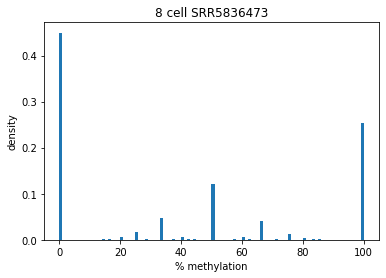

In [38]:
plt.hist(data['%'], density=True, bins=100)
plt.title('8 cell SRR5836473')
plt.xlabel('% methylation')
plt.ylabel('density')
plt.show()

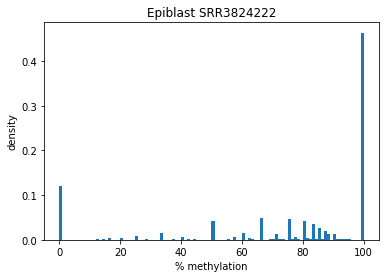

In [39]:
# гистограмма
data = pd.read_csv('/content/drive/MyDrive/bioinfHW1/bismark_methylation_extractor_SRR3824222/SRR3824222_1_bismark_bt2_pe.bam.deduplicated.deduplicated.bedGraph', 
                   delimiter='\t', names=['chr11', 'a', 'b', '%'], skiprows=1)
plt.hist(data['%'], density=True, bins=100)
plt.title('Epiblast SRR3824222')
plt.xlabel('% methylation')
plt.ylabel('density')
plt.show()

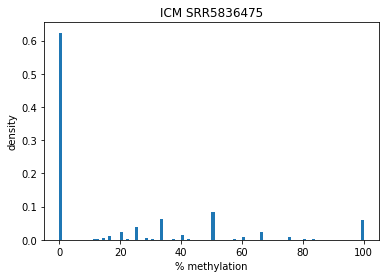

In [40]:
# гистограмма
data = pd.read_csv('/content/drive/MyDrive/bioinfHW1/bismark_methylation_extractor_SRR5836475/SRR5836475_1_bismark_bt2_pe.bam.deduplicated.deduplicated.bedGraph', 
                   delimiter='\t', names=['chr11', 'a', 'b', '%'], skiprows=1)
plt.hist(data['%'], density=True, bins=100)
plt.title('ICM SRR5836475')
plt.xlabel('% methylation')
plt.ylabel('density')
plt.show()

### Уровень метилирования и покрытия для каждого образца

#### Установка

In [2]:
! pip install pyGenomeTracks

  Using cached pyGenomeTracks-3.6-py2.py3-none-any.whl (94 kB)
  Using cached pyBigWig-0.3.18-cp37-cp37m-linux_x86_64.whl
  Using cached pysam-0.18.0-cp37-cp37m-manylinux_2_12_x86_64.manylinux2010_x86_64.whl (14.9 MB)
     |████████████████████████████████| 296 kB 5.3 MB/s 
     |████████████████████████████████| 15.7 MB 56.6 MB/s 
  Using cached gffutils-0.10.1-py3-none-any.whl
  Using cached pybedtools-0.9.0-cp37-cp37m-linux_x86_64.whl
  Using cached future-0.18.2-py3-none-any.whl
     |████████████████████████████████| 11.6 MB 41.6 MB/s 
  Using cached HiCMatrix-15-py3-none-any.whl (37 kB)
  Using cached intervaltree-3.1.0-py2.py3-none-any.whl
  Using cached argcomplete-2.0.0-py2.py3-none-any.whl (37 kB)
  Using cached simplejson-3.17.6-cp37-cp37m-manylinux_2_5_x86_64.manylinux1_x86_64.manylinux_2_12_x86_64.manylinux2010_x86_64.whl (130 kB)
  Using cached pyfaidx-0.6.4-py3-none-any.whl
  Using cached argh-0.26.2-py2.py3-none-any.whl (30 kB)
     |████████████████████████████████| 38

In [3]:
!pip install -U ipykernel


  Using cached ipykernel-6.9.1-py3-none-any.whl (128 kB)
  Using cached ipython-7.31.1-py3-none-any.whl (792 kB)
     |████████████████████████████████| 428 kB 5.3 MB/s 
     |████████████████████████████████| 1.9 MB 49.4 MB/s 
     |████████████████████████████████| 102 kB 7.5 MB/s 
     |████████████████████████████████| 130 kB 39.0 MB/s 
     |████████████████████████████████| 1.1 MB 49.5 MB/s 
     |████████████████████████████████| 59 kB 5.6 MB/s 
     |████████████████████████████████| 1.6 MB 28.0 MB/s 
  Using cached prompt_toolkit-3.0.28-py3-none-any.whl (380 kB)
     |████████████████████████████████| 100 kB 7.3 MB/s 
     |████████████████████████████████| 1.1 MB 42.2 MB/s 
     |████████████████████████████████| 86 kB 4.3 MB/s 


In [4]:
! conda install -c bioconda ucsc-fetchchromsizes

Solving environment: | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ done

## Package Plan ##

  environment location: /usr/local

  added / updated specs:
    - ucsc-fetchchromsizes


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    libpng-1.6.37              |       h21135ba_2         306 KB  conda-forge
    libuuid-2.32.1             |    h7f98852_1000          28 KB  conda-forge
    mysql-connector-c-6.1.11   |    h6eb9d5d_1007         2.7 MB  conda-forge
    ucsc-fetchchromsizes-377   |       h0b8a92a_2           7 KB  bioconda
    ------------------------------------------------------------
                                           Total:         3.0 MB

The following NEW packages will be INSTALLED:

  libpng             conda-forge/linux-64::libpng-1.6.37-h21135ba_2
  libuuid            conda-forge/linux-64::libuuid-2.32.1-h7f98852_1

In [5]:
! fetchChromSizes mm10 > m.chrom.sizes

INFO: trying CURL  for database mm10
url: http://hgdownload.soe.ucsc.edu/goldenPath/mm10/bigZips/mm10.chrom.sizes


In [6]:
! conda install -c bioconda ucsc-bedgraphtobigwig

Solving environment: / - \ | / - \ | / - \ | / - \ | / - \ done

## Package Plan ##

  environment location: /usr/local

  added / updated specs:
    - ucsc-bedgraphtobigwig


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    ucsc-bedgraphtobigwig-377  |       h446ed27_1         321 KB  bioconda
    ------------------------------------------------------------
                                           Total:         321 KB

The following NEW packages will be INSTALLED:

  ucsc-bedgraphtobi~ bioconda/linux-64::ucsc-bedgraphtobigwig-377-h446ed27_1



ucsc-bedgraphtobigwi | 321 KB    | : 100% 1.0/1 [00:00<00:00,  4.30it/s]                
Preparing transaction: / done
Verifying transaction: \ done
Executing transaction: / done


In [7]:
! apt-get install bedtools

Reading package lists... Done
Building dependency tree       
Reading state information... Done
bedtools is already the newest version (2.26.0+dfsg-5).
The following packages were automatically installed and are no longer required:
  cuda-command-line-tools-10-0 cuda-command-line-tools-10-1
  cuda-command-line-tools-11-0 cuda-compiler-10-0 cuda-compiler-10-1
  cuda-compiler-11-0 cuda-cuobjdump-10-0 cuda-cuobjdump-10-1
  cuda-cuobjdump-11-0 cuda-cupti-10-0 cuda-cupti-10-1 cuda-cupti-11-0
  cuda-cupti-dev-11-0 cuda-documentation-10-0 cuda-documentation-10-1
  cuda-documentation-11-0 cuda-documentation-11-1 cuda-gdb-10-0 cuda-gdb-10-1
  cuda-gdb-11-0 cuda-gpu-library-advisor-10-0 cuda-gpu-library-advisor-10-1
  cuda-libraries-10-0 cuda-libraries-10-1 cuda-libraries-11-0
  cuda-memcheck-10-0 cuda-memcheck-10-1 cuda-memcheck-11-0 cuda-nsight-10-0
  cuda-nsight-10-1 cuda-nsight-11-0 cuda-nsight-11-1 cuda-nsight-compute-10-0
  cuda-nsight-compute-10-1 cuda-nsight-compute-11-0 cuda-nsight-comp

#### Графики

In [9]:
! bedtools genomecov -bg -ibam /content/drive/MyDrive/bioinfHW1/SRR5836473_1_bismark_bt2_pe.bam.deduplicated.deduplicated.bam -g m.chromSizes  >  s_8_cell.cover.bedGraph

In [10]:
! bedtools genomecov -bg -ibam /content/drive/MyDrive/bioinfHW1/SRR3824222_1_bismark_bt2_pe.bam.deduplicated.deduplicated.bam -g m.chromSizes  >  epiblast.cover.bedGraph

In [11]:
! bedtools genomecov -bg -ibam /content/drive/MyDrive/bioinfHW1/SRR5836475_1_bismark_bt2_pe.bam.deduplicated.deduplicated.bam -g m.chromSizes  >  icm.cover.bedGraph

In [12]:
! bedGraphToBigWig   s_8_cell.cover.bedGraph m.chrom.sizes cell8_coverage.bigWig

In [13]:
! bedGraphToBigWig   epiblast.cover.bedGraph m.chrom.sizes epiblast_coverage.bigWig

In [14]:
! bedGraphToBigWig   icm.cover.bedGraph m.chrom.sizes icm_coverage.bigWig

In [15]:
! mv cell8_coverage.bigWig cell8_coverage.bigWig.bw
! mv epiblast_coverage.bigWig epiblast_coverage.bigWig.bw
! mv icm_coverage.bigWig icm_coverage.bigWig.bw

In [16]:
! bedGraphToBigWig   /content/drive/MyDrive/bioinfHW1/bismark_methylation_extractor_SRR5836473/SRR5836473_1_bismark_bt2_pe.bam.deduplicated.deduplicated.bedGraph m.chrom.sizes cell8_meth.bigWig.bw
! bedGraphToBigWig   /content/drive/MyDrive/bioinfHW1/bismark_methylation_extractor_SRR3824222/SRR3824222_1_bismark_bt2_pe.bam.deduplicated.deduplicated.bedGraph m.chrom.sizes epiblast_meth.bigWig.bw
! bedGraphToBigWig   /content/drive/MyDrive/bioinfHW1/bismark_methylation_extractor_SRR5836475/SRR5836475_1_bismark_bt2_pe.bam.deduplicated.deduplicated.bedGraph m.chrom.sizes icm_meth.bigWig.bw

In [19]:
! pyGenomeTracks --tracks tracks.ini.txt --region chr11:3100030-4100030 -o image_cov_meth_10000.png

INFO:pygenometracks.tracksClass:initialize 1. [test bigwig]
INFO:pygenometracks.tracksClass:initialize 2. [test bigwig]
INFO:pygenometracks.tracksClass:initialize 3. [spacer]
INFO:pygenometracks.tracksClass:initialize 4. [test bigwig]
INFO:pygenometracks.tracksClass:initialize 5. [test bigwig]
INFO:pygenometracks.tracksClass:initialize 6. [spacer]
INFO:pygenometracks.tracksClass:initialize 7. [test bigwig]
INFO:pygenometracks.tracksClass:initialize 8. [test bigwig]
INFO:pygenometracks.tracksClass:time initializing track(s):
INFO:pygenometracks.tracksClass:0.002991914749145508
DEBUG:pygenometracks.tracksClass:Figure size in cm is 40 x 45.74468085106383. Dpi is set to 72

INFO:pygenometracks.tracksClass:plotting 1. [test bigwig]
INFO:pygenometracks.tracksClass:plotting 2. [test bigwig]
INFO:pygenometracks.tracksClass:plotting 3. [spacer]
INFO:pygenometracks.tracksClass:plotting 4. [test bigwig]
INFO:pygenometracks.tracksClass:plotting 5. [test bigwig]
INFO:pygenometracks.tracksClass:plot

In [21]:
! pyGenomeTracks --tracks tracks.ini.txt --region chr11:3100030-3200030 -o image_cov_meth_1000.png

INFO:pygenometracks.tracksClass:initialize 1. [test bigwig]
INFO:pygenometracks.tracksClass:initialize 2. [test bigwig]
INFO:pygenometracks.tracksClass:initialize 3. [spacer]
INFO:pygenometracks.tracksClass:initialize 4. [test bigwig]
INFO:pygenometracks.tracksClass:initialize 5. [test bigwig]
INFO:pygenometracks.tracksClass:initialize 6. [spacer]
INFO:pygenometracks.tracksClass:initialize 7. [test bigwig]
INFO:pygenometracks.tracksClass:initialize 8. [test bigwig]
INFO:pygenometracks.tracksClass:time initializing track(s):
INFO:pygenometracks.tracksClass:0.0028619766235351562
DEBUG:pygenometracks.tracksClass:Figure size in cm is 40 x 45.74468085106383. Dpi is set to 72

INFO:pygenometracks.tracksClass:plotting 1. [test bigwig]
INFO:pygenometracks.tracksClass:plotting 2. [test bigwig]
INFO:pygenometracks.tracksClass:plotting 3. [spacer]
INFO:pygenometracks.tracksClass:plotting 4. [test bigwig]
INFO:pygenometracks.tracksClass:plotting 5. [test bigwig]
INFO:pygenometracks.tracksClass:plo